In [1]:
models = ['classla_chunk_100000',
          'classla_chunk_300000',
          'classla_chunk_500000',
          'classla_chunk_700000',
          'classla_lg_chunk_100000',
          'classla_lg_chunk_300000',
          'classla_lg_chunk_500000',
          'classla_lg_chunk_700000',
          'nvdia',
          'whisper'
         ]

import glob
manual_dir = '/Users/irisz/downloads/2023_ELIC/Croatian/croatian_manual_annotated_1008/*'
model_dir = '/Users/irisz/downloads/2023_ELIC/Croatian/croatian_model_annotated/'
files = glob.glob(manual_dir)
audios = [item.split('/')[-1].split('.')[0] for item in files if item.endswith('wav')]
audios

['ckm004-2022-07-07-Cres_03',
 'ckm004-2022-07-07-Cres_02',
 'ckm002-2022-01-04-Crikvenica_08',
 'ckm004-2022-07-07-Cres_01',
 'ckm004-2022-07-07-Cres_04',
 'ckm005-2022-11-26-Vrbnik_01',
 'ckm005-2022-11-26-Vrbnik_02',
 'ckm005-2022-11-26-Vrbnik_03',
 'ckm005-2022-11-26-Vrbnik_06',
 'ckm005-2022-11-26-Vrbnik_04',
 'ckm005-2022-11-26-Vrbnik_05',
 'ckm001-2022-01-16-Trviž_04',
 'ckm006-2023-05-28-Kostrena_06',
 'ckm002-2022-01-04-Crikvenica_03',
 'ckm002-2022-01-04-Crikvenica_02',
 'ckm006-2023-05-28-Kostrena_07',
 'ckm001-2022-01-16-Trviž_05',
 'ckm006-2023-05-28-Kostrena_05',
 'ckm002-2022-01-04-Crikvenica_01',
 'ckm006-2023-05-28-Kostrena_04',
 'ckm001-2022-01-16-Trviž_02',
 'ckm002-2022-01-04-Crikvenica_05',
 'ckm006-2023-05-28-Kostrena_01',
 'ckm002-2022-01-04-Crikvenica_04',
 'ckm001-2022-01-16-Trviž_03',
 'ckm001-2022-01-16-Trviž_01',
 'ckm002-2022-01-04-Crikvenica_06',
 'ckm006-2023-05-28-Kostrena_03',
 'ckm006-2023-05-28-Kostrena_02',
 'ckm002-2022-01-04-Crikvenica_07']

In [11]:
def get_wer_from_df(df):
    s = len(df[df['match_type'] == 's'])
    d = len(df[df['match_type'] == 'd'])
    i = len(df[df['match_type'] == 'i'])
    c = len(df[df['match_type'] == 'c'])
    n = s + d + c
    wer = (s + d + i)/n * 100
    return wer,s,d,i,c,n

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/Users/irisz/downloads/2023_ELIC/Croatian/croatian_model_df/' + audios[0] + '_' + models[0] + '.csv')
df                 
                 

,Unnamed: 0,manual,model,idx,match,match_cand,match_cand_score,model_fuzzy,model_fuzzy_score,match_type
0,0,ča,-,0,0,"[0, 1, 2, 3, 4]","[0, 0, 0, 50, 22]",-,0,d
1,1,se,-,1,0,"[1, 2, 3, 4]","[0, 0, 0, 44]",-,0,d
2,2,tiče,-,2,0,"[1, 2, 3, 4]","[0, 0, 33, 73]",setniče,73,s
3,3,-,ta,3,0,"[1, 2, 3, 4]","[0, 0, 0, 0]",-,0,NaN
4,4,-,setniče,4,0,"[1, 2, 3, 4]","[0, 0, 0, 0]",-,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1312,1312,prosti,-,1312,0,"[1312, 1313, 1314, 1315, 1309, 1310, 1311]","[0, 0, 55, 15, 0, 0, 0]",-,0,d
1313,1313,((smijeh)),-,1313,0,"[1312, 1313, 1314, 1315, 1309, 1310, 1311]","[0, 0, 13, 12, 0, 0, 0]",-,0,d
1314,1314,-,praci,1314,0,"[1312, 1313, 1314, 1315, 1309, 1310, 1311]","[0, 0, 0, 0, 0, 0, 0]",-,0,NaN
1315,1315,-,boževne,1315,0,"[1312, 1313, 1314, 1315, 1309, 1310, 1311]","[0, 0, 0, 0, 0, 0, 0]",-,0,NaN


In [9]:
df['match_type'].value_counts()

c    537
s    237
d    217
i      6
Name: match_type, dtype: int64

In [12]:
get_wer_from_df(df)

(46.41775983854692, 237, 217, 6, 537, 991)

In [15]:
# read in df and collect the s,d,i,c


wer_all = {}
for i in range(len(audios)):
    file_name = audios[i]
    print (file_name)
    wer = {}
    for j in range(len(models)):
        model_name = models[j]
        df = pd.read_csv('/Users/irisz/downloads/2023_ELIC/Croatian/croatian_model_df/' + file_name + '_' + model_name + '.csv')
        wer[model_name] = get_wer_from_df(df)  #wer,s,d,i,c,n
    wer_all[file_name] = wer
wer_all
    

ckm004-2022-07-07-Cres_03
ckm004-2022-07-07-Cres_02
ckm002-2022-01-04-Crikvenica_08
ckm004-2022-07-07-Cres_01
ckm004-2022-07-07-Cres_04
ckm005-2022-11-26-Vrbnik_01
ckm005-2022-11-26-Vrbnik_02
ckm005-2022-11-26-Vrbnik_03
ckm005-2022-11-26-Vrbnik_06
ckm005-2022-11-26-Vrbnik_04
ckm005-2022-11-26-Vrbnik_05
ckm001-2022-01-16-Trviž_04
ckm006-2023-05-28-Kostrena_06
ckm002-2022-01-04-Crikvenica_03
ckm002-2022-01-04-Crikvenica_02
ckm006-2023-05-28-Kostrena_07
ckm001-2022-01-16-Trviž_05
ckm006-2023-05-28-Kostrena_05
ckm002-2022-01-04-Crikvenica_01
ckm006-2023-05-28-Kostrena_04
ckm001-2022-01-16-Trviž_02
ckm002-2022-01-04-Crikvenica_05
ckm006-2023-05-28-Kostrena_01
ckm002-2022-01-04-Crikvenica_04
ckm001-2022-01-16-Trviž_03
ckm001-2022-01-16-Trviž_01
ckm002-2022-01-04-Crikvenica_06
ckm006-2023-05-28-Kostrena_03
ckm006-2023-05-28-Kostrena_02
ckm002-2022-01-04-Crikvenica_07


{'ckm004-2022-07-07-Cres_03': {'classla_chunk_100000': (46.41775983854692,
   237,
   217,
   6,
   537,
   991),
  'classla_chunk_300000': (41.27144298688194, 221, 181, 7, 589, 991),
  'classla_chunk_500000': (39.858728557013116, 199, 191, 5, 601, 991),
  'classla_chunk_700000': (40.363269424823415, 205, 190, 5, 596, 991),
  'classla_lg_chunk_100000': (41.06962663975782, 220, 181, 6, 590, 991),
  'classla_lg_chunk_300000': (40.96871846619577, 220, 183, 3, 588, 991),
  'classla_lg_chunk_500000': (41.372351160444, 219, 184, 7, 588, 991),
  'classla_lg_chunk_700000': (39.656912209889, 200, 186, 7, 605, 991),
  'nvdia': (31.48335015136226, 173, 136, 3, 682, 991),
  'whisper': (54.4904137235116, 291, 241, 8, 459, 991)},
 'ckm004-2022-07-07-Cres_02': {'classla_chunk_100000': (43.13072439633638,
   301,
   206,
   11,
   694,
   1201),
  'classla_chunk_300000': (40.63280599500416, 265, 213, 10, 723, 1201),
  'classla_chunk_500000': (39.30058284762698, 242, 224, 6, 735, 1201),
  'classla_chun

In [16]:
rows_list = []
for i in range(len(audios)):
    
    file_name = audios[i]
    row = [file_name]
    for j in range(len(models)):
        model_name = models[j]
        row.append(wer_all[file_name][model_name])
    rows_list.append(row)

df_wer = pd.DataFrame(rows_list)               
df_wer

,0,1,2,3,4,5,6,7,8,9,10
0,ckm004-2022-07-07-Cres_03,"(46.41775983854692, 237, 217, 6, 537, 991)","(41.27144298688194, 221, 181, 7, 589, 991)","(39.858728557013116, 199, 191, 5, 601, 991)","(40.363269424823415, 205, 190, 5, 596, 991)","(41.06962663975782, 220, 181, 6, 590, 991)","(40.96871846619577, 220, 183, 3, 588, 991)","(41.372351160444, 219, 184, 7, 588, 991)","(39.656912209889, 200, 186, 7, 605, 991)","(31.48335015136226, 173, 136, 3, 682, 991)","(54.4904137235116, 291, 241, 8, 459, 991)"
1,ckm004-2022-07-07-Cres_02,"(43.13072439633638, 301, 206, 11, 694, 1201)","(40.63280599500416, 265, 213, 10, 723, 1201)","(39.30058284762698, 242, 224, 6, 735, 1201)","(38.63447127393839, 257, 201, 6, 743, 1201)","(39.800166527893424, 281, 188, 9, 732, 1201)","(36.63613655287261, 244, 188, 8, 769, 1201)","(37.218984179850125, 258, 184, 5, 759, 1201)","(37.55203996669442, 244, 200, 7, 757, 1201)","(31.973355537052456, 230, 144, 10, 827, 1201)","(49.875104079933394, 362, 233, 4, 606, 1201)"
2,ckm002-2022-01-04-Crikvenica_08,"(44.69096671949287, 159, 120, 3, 352, 631)","(45.00792393026941, 148, 133, 3, 350, 631)","(43.58161648177496, 144, 128, 3, 359, 631)","(43.74009508716323, 136, 139, 1, 356, 631)","(44.69096671949287, 156, 122, 4, 353, 631)","(44.057052297939784, 158, 116, 4, 357, 631)","(44.21553090332805, 156, 119, 4, 356, 631)","(44.21553090332805, 146, 130, 3, 355, 631)","(37.400950871632325, 136, 93, 7, 402, 631)","(59.11251980982567, 188, 183, 2, 260, 631)"
3,ckm004-2022-07-07-Cres_01,"(46.94708276797829, 190, 148, 8, 399, 737)","(43.69063772048847, 169, 146, 7, 422, 737)","(45.31886024423338, 194, 136, 4, 407, 737)","(43.28358208955223, 177, 140, 2, 420, 737)","(47.08276797829037, 189, 154, 4, 394, 737)","(43.28358208955223, 187, 128, 4, 422, 737)","(42.87652645861601, 179, 134, 3, 424, 737)","(44.23337856173677, 182, 143, 1, 412, 737)","(38.398914518317504, 184, 96, 3, 457, 737)","(61.601085481682496, 252, 198, 4, 287, 737)"
4,ckm004-2022-07-07-Cres_04,"(47.22422494592646, 343, 302, 10, 742, 1387)","(45.133381398702234, 321, 299, 6, 767, 1387)","(44.77289113193944, 313, 300, 8, 774, 1387)","(44.917087238644555, 321, 295, 7, 771, 1387)","(44.628695025234315, 318, 296, 5, 773, 1387)","(43.403028118240805, 317, 280, 5, 790, 1387)","(43.25883201153569, 325, 266, 9, 796, 1387)","(42.898341744772885, 312, 278, 5, 797, 1387)","(36.481614996395095, 302, 197, 7, 888, 1387)","(53.78514780100937, 407, 335, 4, 645, 1387)"
5,ckm005-2022-11-26-Vrbnik_01,"(41.17647058823529, 331, 292, 7, 907, 1530)","(39.411764705882355, 313, 283, 7, 934, 1530)","(40.71895424836601, 320, 296, 7, 914, 1530)","(40.0, 305, 300, 7, 925, 1530)","(42.549019607843135, 344, 297, 10, 889, 1530)","(42.41830065359477, 337, 305, 7, 888, 1530)","(41.24183006535947, 318, 309, 4, 903, 1530)","(42.15686274509804, 323, 314, 8, 893, 1530)","(33.39869281045751, 280, 226, 5, 1024, 1530)","(54.052287581699346, 438, 383, 6, 709, 1530)"
6,ckm005-2022-11-26-Vrbnik_02,"(42.867182009838366, 329, 275, 6, 819, 1423)","(41.04005621925509, 300, 280, 4, 843, 1423)","(40.89950808151792, 313, 263, 6, 847, 1423)","(40.68868587491215, 285, 286, 8, 852, 1423)","(41.321152494729446, 312, 267, 9, 844, 1423)","(39.91567111735769, 299, 265, 4, 859, 1423)","(40.056219255094874, 295, 267, 8, 861, 1423)","(41.110330288123684, 286, 293, 6, 844, 1423)","(34.08292340126493, 269, 209, 7, 945, 1423)","(51.58116654954322, 410, 323, 1, 690, 1423)"
7,ckm005-2022-11-26-Vrbnik_03,"(40.666666666666664, 290, 252, 7, 808, 1350)","(38.96296296296296, 273, 246, 7, 831, 1350)","(39.62962962962963, 296, 234, 5, 820, 1350)","(39.25925925925926, 262, 263, 5, 825, 1350)","(39.62962962962963, 295, 230, 10, 825, 1350)","(38.51851851851852, 259, 250, 11, 841, 1350)","(40.22222222222222, 289, 250, 4, 811, 1350)","(40.0, 286, 247, 7, 817, 1350)","(32.370370370370374, 249, 183, 5, 918, 1350)","(51.85185185185185, 364, 333, 3, 653, 1350)"
8,ckm005-2022-11-26-Vrbnik_06,"(42.32036914963744, 323, 306, 13, 888, 1517)","(40.40870138

In [17]:
cols = ['file', 'classla_chunk_100000',
          'classla_chunk_300000',
          'classla_chunk_500000',
          'classla_chunk_700000',
          'classla_lg_chunk_100000',
          'classla_lg_chunk_300000',
          'classla_lg_chunk_500000',
          'classla_lg_chunk_700000',
          'nvidia',
          'whisper-base']
for i in range(11):
    df_wer = df_wer.rename(columns={i: cols[i]})
df_wer

,file,classla_chunk_100000,classla_chunk_300000,classla_chunk_500000,classla_chunk_700000,classla_lg_chunk_100000,classla_lg_chunk_300000,classla_lg_chunk_500000,classla_lg_chunk_700000,nvidia,whisper-base
0,ckm004-2022-07-07-Cres_03,"(46.41775983854692, 237, 217, 6, 537, 991)","(41.27144298688194, 221, 181, 7, 589, 991)","(39.858728557013116, 199, 191, 5, 601, 991)","(40.363269424823415, 205, 190, 5, 596, 991)","(41.06962663975782, 220, 181, 6, 590, 991)","(40.96871846619577, 220, 183, 3, 588, 991)","(41.372351160444, 219, 184, 7, 588, 991)","(39.656912209889, 200, 186, 7, 605, 991)","(31.48335015136226, 173, 136, 3, 682, 991)","(54.4904137235116, 291, 241, 8, 459, 991)"
1,ckm004-2022-07-07-Cres_02,"(43.13072439633638, 301, 206, 11, 694, 1201)","(40.63280599500416, 265, 213, 10, 723, 1201)","(39.30058284762698, 242, 224, 6, 735, 1201)","(38.63447127393839, 257, 201, 6, 743, 1201)","(39.800166527893424, 281, 188, 9, 732, 1201)","(36.63613655287261, 244, 188, 8, 769, 1201)","(37.218984179850125, 258, 184, 5, 759, 1201)","(37.55203996669442, 244, 200, 7, 757, 1201)","(31.973355537052456, 230, 144, 10, 827, 1201)","(49.875104079933394, 362, 233, 4, 606, 1201)"
2,ckm002-2022-01-04-Crikvenica_08,"(44.69096671949287, 159, 120, 3, 352, 631)","(45.00792393026941, 148, 133, 3, 350, 631)","(43.58161648177496, 144, 128, 3, 359, 631)","(43.74009508716323, 136, 139, 1, 356, 631)","(44.69096671949287, 156, 122, 4, 353, 631)","(44.057052297939784, 158, 116, 4, 357, 631)","(44.21553090332805, 156, 119, 4, 356, 631)","(44.21553090332805, 146, 130, 3, 355, 631)","(37.400950871632325, 136, 93, 7, 402, 631)","(59.11251980982567, 188, 183, 2, 260, 631)"
3,ckm004-2022-07-07-Cres_01,"(46.94708276797829, 190, 148, 8, 399, 737)","(43.69063772048847, 169, 146, 7, 422, 737)","(45.31886024423338, 194, 136, 4, 407, 737)","(43.28358208955223, 177, 140, 2, 420, 737)","(47.08276797829037, 189, 154, 4, 394, 737)","(43.28358208955223, 187, 128, 4, 422, 737)","(42.87652645861601, 179, 134, 3, 424, 737)","(44.23337856173677, 182, 143, 1, 412, 737)","(38.398914518317504, 184, 96, 3, 457, 737)","(61.601085481682496, 252, 198, 4, 287, 737)"
4,ckm004-2022-07-07-Cres_04,"(47.22422494592646, 343, 302, 10, 742, 1387)","(45.133381398702234, 321, 299, 6, 767, 1387)","(44.77289113193944, 313, 300, 8, 774, 1387)","(44.917087238644555, 321, 295, 7, 771, 1387)","(44.628695025234315, 318, 296, 5, 773, 1387)","(43.403028118240805, 317, 280, 5, 790, 1387)","(43.25883201153569, 325, 266, 9, 796, 1387)","(42.898341744772885, 312, 278, 5, 797, 1387)","(36.481614996395095, 302, 197, 7, 888, 1387)","(53.78514780100937, 407, 335, 4, 645, 1387)"
5,ckm005-2022-11-26-Vrbnik_01,"(41.17647058823529, 331, 292, 7, 907, 1530)","(39.411764705882355, 313, 283, 7, 934, 1530)","(40.71895424836601, 320, 296, 7, 914, 1530)","(40.0, 305, 300, 7, 925, 1530)","(42.549019607843135, 344, 297, 10, 889, 1530)","(42.41830065359477, 337, 305, 7, 888, 1530)","(41.24183006535947, 318, 309, 4, 903, 1530)","(42.15686274509804, 323, 314, 8, 893, 1530)","(33.39869281045751, 280, 226, 5, 1024, 1530)","(54.052287581699346, 438, 383, 6, 709, 1530)"
6,ckm005-2022-11-26-Vrbnik_02,"(42.867182009838366, 329, 275, 6, 819, 1423)","(41.04005621925509, 300, 280, 4, 843, 1423)","(40.89950808151792, 313, 263, 6, 847, 1423)","(40.68868587491215, 285, 286, 8, 852, 1423)","(41.321152494729446, 312, 267, 9, 844, 1423)","(39.91567111735769, 299, 265, 4, 859, 1423)","(40.056219255094874, 295, 267, 8, 861, 1423)","(41.110330288123684, 286, 293, 6, 844, 1423)","(34.08292340126493, 269, 209, 7, 945, 1423)","(51.58116654954322, 410, 323, 1, 690, 1423)"
7,ckm005-2022-11-26-Vrbnik_03,"(40.666666666666664, 290, 252, 7, 808, 1350)","(38.96296296296296, 273, 246, 7, 831, 1350)","(39.62962962962963, 296, 234, 5, 820, 1350)","(39.25925925925926, 262, 263, 5, 825, 1350)","(39.62962962962963, 295, 230, 10, 825, 1350)","(38.51851851851852, 259, 250, 11, 841, 1350)","(40.22222222222222, 289, 250, 4, 811, 1350)","(40.0, 286, 247, 7, 817, 1350)","

In [18]:
rows_list = []
for i in range(len(audios)):
    
    file_name = audios[i]
    row = [file_name]
    for j in range(len(models)):
        model_name = models[j]
        row.append(wer_all[file_name][model_name][0])
    rows_list.append(row)

df_wer_0 = pd.DataFrame(rows_list)   
for i in range(11):
    df_wer_0 = df_wer_0.rename(columns={i: cols[i]})
df_wer_0

,file,classla_chunk_100000,classla_chunk_300000,classla_chunk_500000,classla_chunk_700000,classla_lg_chunk_100000,classla_lg_chunk_300000,classla_lg_chunk_500000,classla_lg_chunk_700000,nvidia,whisper-base
0,ckm004-2022-07-07-Cres_03,46.417760,41.271443,39.858729,40.363269,41.069627,40.968718,41.372351,39.656912,31.483350,54.490414
1,ckm004-2022-07-07-Cres_02,43.130724,40.632806,39.300583,38.634471,39.800167,36.636137,37.218984,37.552040,31.973356,49.875104
2,ckm002-2022-01-04-Crikvenica_08,44.690967,45.007924,43.581616,43.740095,44.690967,44.057052,44.215531,44.215531,37.400951,59.112520
3,ckm004-2022-07-07-Cres_01,46.947083,43.690638,45.318860,43.283582,47.082768,43.283582,42.876526,44.233379,38.398915,61.601085
4,ckm004-2022-07-07-Cres_04,47.224225,45.133381,44.772891,44.917087,44.628695,43.403028,43.258832,42.898342,36.481615,53.785148
5,ckm005-2022-11-26-Vrbnik_01,41.176471,39.411765,40.718954,40.000000,42.549020,42.418301,41.241830,42.156863,33.398693,54.052288
6,ckm005-2022-11-26-Vrbnik_02,42.867182,41.040056,40.899508,40.688686,41.321152,39.915671,40.056219,41.110330,34.082923,51.581167
7,ckm005-2022-11-26-Vrbnik_03,40.666667,38.962963,39.629630,39.259259,39.629630,38.518519,40.222222,40.000000,32.370370,51.851852
8,ckm005-2022-11-26-Vrbnik_06,42.320369,40.408701,41.001978,41.793013,43.902439,42.781806,41.858932,42.649967,35.332894,52.933421
9,ckm005-2022-11-26-Vrbnik_04,43.544137,42.424242,41.238472,40.974967,40.777339,39.723320,40.250329,40.909091,33.728590,49.868248


In [19]:
df_wer_0.to_csv('/Users/irisz/downloads/2023_ELIC/Croatian/model_wer_correct.csv')

In [20]:
models = ['classla_chunk_100000',
          'classla_chunk_300000',
          'classla_chunk_500000',
          'classla_chunk_700000',
          'classla_lg_chunk_100000',
          'classla_lg_chunk_300000',
          'classla_lg_chunk_500000',
          'classla_lg_chunk_700000',
          'nvidia',
          'whisper-base']

df_wer_0[models].describe()

,classla_chunk_100000,classla_chunk_300000,classla_chunk_500000,classla_chunk_700000,classla_lg_chunk_100000,classla_lg_chunk_300000,classla_lg_chunk_500000,classla_lg_chunk_700000,nvidia,whisper-base
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,47.612295,45.579929,45.797524,46.246543,46.591505,45.205471,45.863250,46.286210,39.401908,55.863644
std,5.121190,5.409254,6.011809,6.284575,5.685768,5.521113,5.857969,6.113917,6.145322,5.386690
min,40.666667,38.962963,38.583815,38.634471,39.629630,36.636137,37.218984,37.552040,31.483350,46.817786
25%,43.739663,41.097903,40.764093,40.760256,42.546584,41.163697,41.382358,41.371963,34.238663,52.117538
50%,46.682421,44.530737,44.488197,44.464147,44.908509,43.369779,43.438914,43.872471,37.179660,54.271351
75%,50.509356,49.198693,52.132330,52.610778,47.611101,47.805162,49.949242,51.221116,45.327269,59.437676
max,57.873754,56.810631,57.275748,57.541528,58.985879,56.345515,57.830552,58.985879,50.706033,66.752246


In [21]:
df_wer_0[models].describe().to_csv('/Users/irisz/downloads/2023_ELIC/pic/wer_correct.csv')

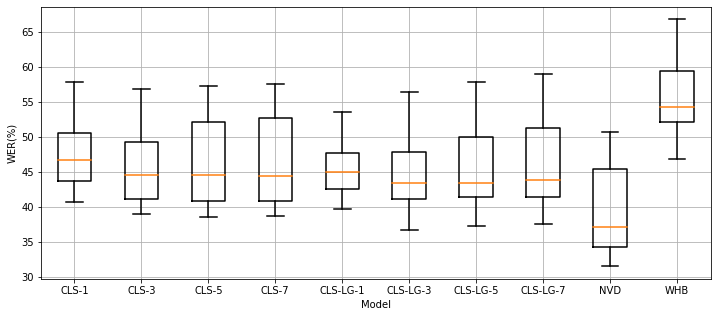

In [22]:
ax = df_wer_0.boxplot(column=models, figsize=(12,5), 
                     color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=0)  
ax.set_xlabel("Model")
ax.set_ylabel("WER(%)")
ax.set_xticklabels(['CLS-1', 'CLS-3','CLS-5','CLS-7','CLS-LG-1', 'CLS-LG-3','CLS-LG-5','CLS-LG-7', 'NVD', 'WHB'])
fig = ax.get_figure()
#fig.savefig('/Users/irisz/downloads/2023_ELIC/pic/model_wer_all.png', dpi=300, bbox_inches='tight')

<ipython-input-23-40fa4065eb60>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['CLS-1', 'CLS-3','CLS-5','CLS-7','CLS-LG-1', 'CLS-LG-3','CLS-LG-5','CLS-LG-7', 'NVD', 'WHB'])


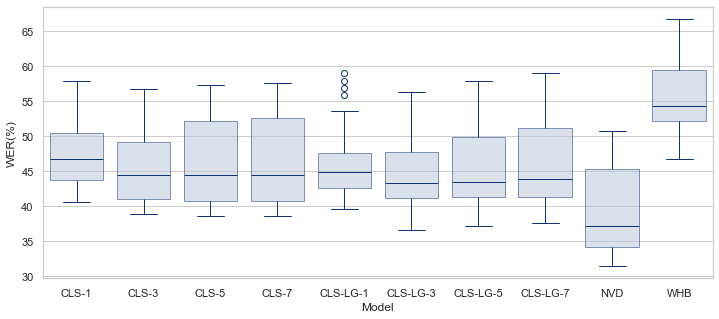

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data = df_wer_0[models],
                 linewidth=1,
                 color="lightsteelblue", linecolor="#137", boxprops=dict(alpha=.5))
ax.set_xlabel("Model")
ax.set_ylabel("WER(%)")
ax.set_xticklabels(['CLS-1', 'CLS-3','CLS-5','CLS-7','CLS-LG-1', 'CLS-LG-3','CLS-LG-5','CLS-LG-7', 'NVD', 'WHB'])
fig = ax.get_figure()
fig.savefig('/Users/irisz/downloads/2023_ELIC/pic/model_wer_all.png', dpi=300, bbox_inches='tight')

In [24]:
from scipy import stats


In [25]:
stats.ttest_rel(df_wer_0['classla_chunk_100000'], df_wer_0['classla_chunk_300000'])

Ttest_relResult(statistic=9.39433311033929, pvalue=2.6708316458490796e-10)

In [26]:
stats.ttest_rel(df_wer_0['classla_chunk_300000'], df_wer_0['classla_chunk_500000'])

Ttest_relResult(statistic=-0.7733408360356737, pvalue=0.445579024778627)

In [27]:
stats.ttest_rel(df_wer_0['classla_chunk_500000'], df_wer_0['classla_chunk_700000'])

Ttest_relResult(statistic=-2.2394924122561974, pvalue=0.03295825824992997)

In [28]:
stats.ttest_rel(df_wer_0['classla_chunk_300000'], df_wer_0['classla_chunk_700000'])

Ttest_relResult(statistic=-2.2072777045568936, pvalue=0.03536230980007155)

In [ ]:
1 > 3 = 5 < 7

In [29]:
stats.ttest_rel(df_wer_0['classla_lg_chunk_100000'], df_wer_0['classla_lg_chunk_300000'])

Ttest_relResult(statistic=6.726034948724736, pvalue=2.22091070405994e-07)

In [30]:
stats.ttest_rel(df_wer_0['classla_lg_chunk_300000'], df_wer_0['classla_lg_chunk_500000'])

Ttest_relResult(statistic=-3.3287407411806, pvalue=0.0023831388264561057)

In [31]:
stats.ttest_rel(df_wer_0['classla_lg_chunk_500000'], df_wer_0['classla_lg_chunk_700000'])

Ttest_relResult(statistic=-1.7279540256814665, pvalue=0.09463288602408176)

In [32]:
stats.ttest_rel(df_wer_0['classla_lg_chunk_300000'], df_wer_0['classla_lg_chunk_700000'])

Ttest_relResult(statistic=-3.670731676141046, pvalue=0.000970299101944369)

In [ ]:
1 > 3 < 5 < 7

In [37]:
stats.ttest_rel(df_wer_0['classla_lg_chunk_300000'], df_wer_0['classla_chunk_300000'])

Ttest_relResult(statistic=-1.183479149344039, pvalue=0.2462302570004668)

In [35]:
stats.ttest_rel(df_wer_0['classla_chunk_300000'], df_wer_0['nvidia'])

Ttest_relResult(statistic=11.767705809832906, pvalue=1.454609662905368e-12)

In [36]:
stats.ttest_rel(df_wer_0['classla_chunk_300000'], df_wer_0['whisper-base'])

Ttest_relResult(statistic=-20.208406867987307, pvalue=1.239442362362691e-18)

In [38]:
stats.ttest_rel(df_wer_0['nvidia'], df_wer_0['classla_chunk_300000'])

Ttest_relResult(statistic=-11.767705809832906, pvalue=1.454609662905368e-12)

In [39]:
stats.ttest_rel(df_wer_0['nvidia'], df_wer_0['classla_lg_chunk_300000'])

Ttest_relResult(statistic=-11.146017054548818, pvalue=5.326897333909811e-12)

In [40]:
stats.ttest_rel( df_wer_0['whisper-base'], df_wer_0['classla_chunk_300000'])

Ttest_relResult(statistic=20.208406867987307, pvalue=1.239442362362691e-18)

In [41]:
stats.ttest_rel( df_wer_0['whisper-base'], df_wer_0['classla_lg_chunk_300000'])

Ttest_relResult(statistic=21.91667431454416, pvalue=1.3553014024045647e-19)

In [42]:
stats.ttest_rel( df_wer_0['whisper-base'], df_wer_0['nvidia'])

Ttest_relResult(statistic=25.002085329385796, pvalue=3.581682980912917e-21)

In [ ]:
'classla_chunk_100000',
          'classla_chunk_300000',
          'classla_chunk_500000',
          'classla_chunk_700000',
          'classla_lg_chunk_100000',
          'classla_lg_chunk_300000',
          'classla_lg_chunk_500000',
          'classla_lg_chunk_700000',
          'nvdia',
          'whisper'